# Deep Learning Regression with Admissions Data

In this Deep Learning Project - provided by Code Academy, we will try to predict the likelihood that a student applying to a graduate school will be accepted based on various application factors.

In this project TensorFlow with Keras will be used to create a regression model that can be evaluate the chances of an application being admitted.

In [43]:
#Importing the modules needed for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

### Reading in and viewing the data

In [44]:
data = pd.read_csv('admissions_data.csv')


data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data pre-processing

In [61]:
features = data.iloc[:, 1:8] #Selecting our features
labels = data.iloc[:, -1] #Final column selected for predictions


#splitting the data into training and test data

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.33, 
                                                                            random_state=42) 

#Standardising the data using Column Transformer

sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

### Designing the Model

In [62]:
def design_model(feature_data):
    model = Sequential()
    num_of_features = feature_data.shape[1]
    input = tf.keras.Input(shape = (num_of_features))
    model.add(input)
    
    # Hidden Layer 1 with a relu activation function and dropout value of 0.1
    hidden_layer = layers.Dense(16, activation = 'relu')
    model.add(hidden_layer)
    model.add(layers.Dropout(0.1))
    
    # Hidden Layer 2 with a relu activation function and dropout value of 0.2
    hidden_layer2 = layers.Dense(8, activation = 'relu')
    model.add(hidden_layer2)
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    
    # Adam optimiser of 0.005
    # Loss function of mean squared error and metric of mean average error
    opt = keras.optimizers.Adam(learning_rate = 0.005)
    model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)
    
    return model

### Evaluating the Model

MAE:  0.0417913943529129
0.8294003379186589


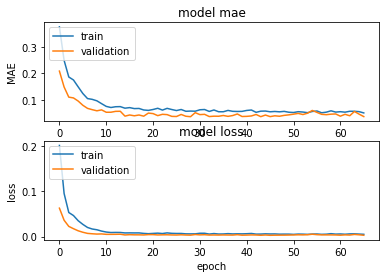

In [67]:
# Applying the model to the scaled training data
model = design_model(features_train_scaled) 

# Appyling early stopping for increased efficiency
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = 20) 

# Fitting the model with 100 epochs, batch size 8 and validation split of 0.25
history = model.fit(features_train_scaled, 
                    labels_train.to_numpy(), 
                    epochs = 100, 
                    batch_size = 8, 
                    verbose = 0, 
                    validation_split = 0.25, 
                    callbacks = [es])

# Evaluating the models performance
val_mse, val_mae = model.evaluate(features_test_scaled, labels_test.to_numpy(), verbose = 0)


# view the MAE performance
print("MAE: ", val_mae)

# evauate r-squared score
y_pred = model.predict(features_test_scaled)

print(r2_score(labels_test, y_pred))

# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc = 'upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc = 'upper left')

plt.show()
